In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
image = cv2.imread("1.jpg")  # Görüntüyü oku
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

In [3]:
# Görüntünün boyutlarını al
h, w, c = image.shape

# Görüntüyü 2D bir diziye dönüştür (her piksel için R, G, B değerleri)
pixels = image.reshape((-1, 3))

In [4]:
# K-Means algoritmasını uygula (K=8 olarak seçtik)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans.fit(pixels)

KMeans(n_init=10, random_state=42)

In [5]:
# Küme merkezlerini al
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Her pikseli en yakın küme merkezine ata
compressed_image = centroids[labels].reshape(image.shape).astype(np.uint8)

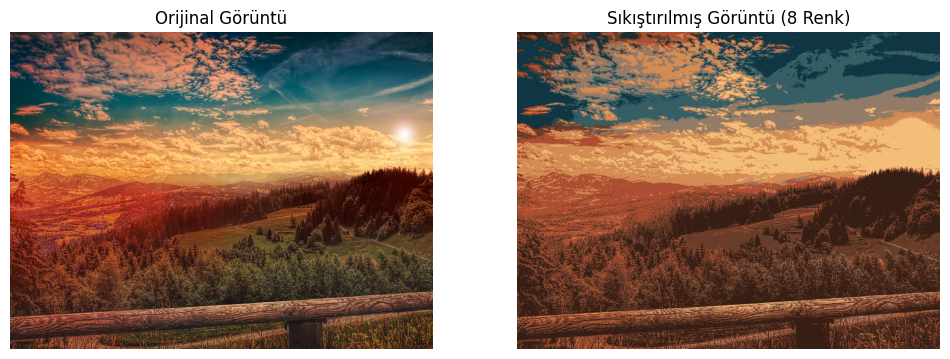

In [7]:
# Orijinal ve sıkıştırılmış görüntüyü görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Orijinal Görüntü")
ax[0].axis("off")

ax[1].imshow(compressed_image)
ax[1].set_title("Sıkıştırılmış Görüntü (8 Renk)")
ax[1].axis("off")

plt.show()

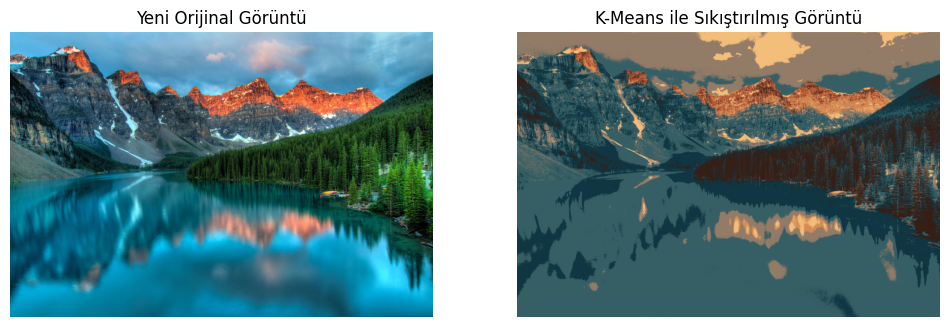

In [8]:
new_image = cv2.imread("2.jpeg")  # Yeni görüntüyü oku
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)  # RGB formatına çevir

# Görüntüyü 2D diziye dönüştür (pikselleri vektör haline getir)
new_pixels = new_image.reshape((-1, 3))

# Eğitilmiş model ile yeni görüntünün piksellerini sınıflandır
new_labels = kmeans.predict(new_pixels)  # K-Means modelini kullanarak tahmin yap

# Yeni küme merkezlerine en yakın renkleri kullanarak görüntüyü yeniden oluştur
new_compressed_image = kmeans.cluster_centers_[new_labels].reshape(new_image.shape).astype(np.uint8)

# Sonucu görselleştir
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(new_image)
ax[0].set_title("Yeni Orijinal Görüntü")
ax[0].axis("off")

ax[1].imshow(new_compressed_image)
ax[1].set_title("K-Means ile Sıkıştırılmış Görüntü")
ax[1].axis("off")

plt.show()